# About Sentiment  Analysis

![](SentimentAnalysis.width-800.png)

Sentiment analysis is the area which deals with judgments, responses as well as **feelings, which is generated from texts**, being extensively used in fields like data mining, web mining, and social media analytics because sentiments are the most essential characteristics to judge the human behavior.

# About Project

**Project Description:**

We have 14640 rows and 15 columns.

In this study, our primary goal is to increase our data discovery skills, metrics are secondary. 

1 - Loading data and libraries

2 - Drill down on all columns 

3 - Cleaning and visualization steps

4 - Vectoring and creating models

5 - Reviewing forecast results and metrics 

![](what-is-sentiment-analysis6@2x.png)

**Data Description:**

We have a dataset that includes the posted tweet, which airline it was posted about, some location information, time, sentiment, etc.
We have 14640 rows and 15 columns. Some important features:

- Date of the first collected tweet: 2015-02-16 23:36:05
- Date of the last collected tweet: 2015-02-24 11:53:37

- Airlines: 'Virgin America', 'United', 'Southwest', 'Delta', 'US Airways', 'American'
       
- Sentiments: Positive, negative and neutral.



### Import Libraries

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np


import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import nltk as nlp
import re

import warnings
warnings.filterwarnings('ignore')
from collections import Counter # for most common word

# model and metric part
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score



### Load Data

In [2]:
data = pd.read_csv("/Users/skaraderili/PycharmProjects/sentiment_airline/Tweets.csv")

In [3]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
print("Shape of data: ", data.shape)

Shape of data:  (14640, 15)


*So we have 14640 raws and 15 columns.*

*And we have some missing values and wrong data types. We will examine each before prediction.*

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

# EDA

### tweet_id column

In [6]:
print("Unique value of a column tweet_id: ",data.tweet_id.nunique())
print("Number of unique values expected for all tweets: ", data.shape[0])
print("Number of missing values: ",data.tweet_id.isnull().sum())

Unique value of a column tweet_id:  14485
Number of unique values expected for all tweets:  14640
Number of missing values:  0


*We dont have missing values, this mean we have some duplicated values in tweet_id.*

In [7]:
print("Number of our duplicated values: ",data.tweet_id.duplicated().sum())

Number of our duplicated values:  155


In [8]:
# Use if you need df format.
duplicated_data = data[data.tweet_id.duplicated()== True] 

*Let's examine a few examples of lines with the same tweet_id.*


*Duplicated_data contains only orphaned / duplicated rows.*

In [9]:
# data[data.tweet_id.duplicated()== True].tweet_id

In [10]:
data[data.tweet_id ==569621879633391616]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
12031,569621879633391616,negative,1.0,Customer Service Issue,1.0,American,negative,salitron78,Customer Service Issue,0,@AmericanAir no response to DM or email yet. ...,NaN,2015-02-22 14:16:53 -0800,on @TheJR,Seoul
14392,569621879633391616,negative,1.0,Customer Service Issue,1.0,American,NaN,salitron78,NaN,0,@AmericanAir no response to DM or email yet. ...,NaN,2015-02-22 14:16:53 -0800,on @TheJR,Seoul


In [11]:
duplicated_data.tweet_id.nunique()    # only duplicated columns from original data

155

In [12]:
duplicated_data[duplicated_data.tweet_id ==569621879633391616]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14392,569621879633391616,negative,1.0,Customer Service Issue,1.0,American,NaN,salitron78,NaN,0,@AmericanAir no response to DM or email yet. ...,NaN,2015-02-22 14:16:53 -0800,on @TheJR,Seoul


In [13]:
print("The number of users who posted this 155 duplicate tweets: ", duplicated_data.name.nunique())

The number of users who posted this 155 duplicate tweets:  111


In [14]:
duplicated_data.airline_sentiment.value_counts()

negative    96
neutral     30
positive    29
Name: airline_sentiment, dtype: int64

*Distribution of the sentiments in duplicated_data is close to the distribution in original data.*

*Time, person and text look the same in repetitive tweets.*

**Assumption:**


*I think this is a problem with the application and those who repeat should be excluded from our data.*

In [15]:
print("Before dropping duplicates: ",data.shape)

Before dropping duplicates:  (14640, 15)


In [16]:
data.drop(data[data.tweet_id.duplicated()== True].index, inplace = True)

In [17]:
print("After dropping duplicates: ",data.shape)

After dropping duplicates:  (14485, 15)


### Airline Sentiment Column

In [18]:
import matplotlib.pyplot as plt 


In [19]:
print("We have 3 different sentiments: ",data.airline_sentiment.unique())

We have 3 different sentiments:  ['neutral' 'positive' 'negative']


In [20]:
sentiment_count=data['airline_sentiment'].value_counts()

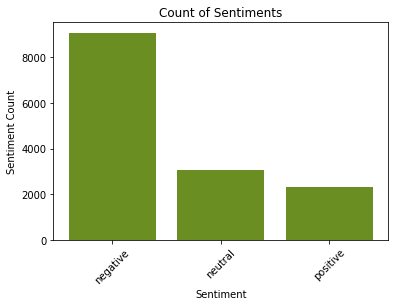

In [21]:
index = [1,2,3]
plt.bar(index,sentiment_count, color ="olivedrab")
plt.xticks(index,['negative','neutral','positive'],rotation=45)
plt.ylabel('Sentiment Count')
plt.xlabel('Sentiment')
plt.title('Count of Sentiments')
plt.show()

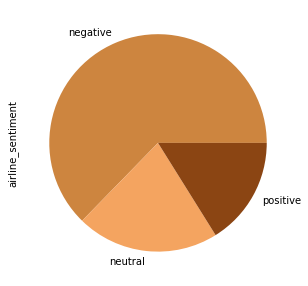

In [22]:
data.airline_sentiment.value_counts().plot.pie(figsize=(5, 5),colors = ['peru','sandybrown','saddlebrown'])
plt.show()

*We have 3 sentiments. We see, most of sentiments are negative. And our data is unbalanced data.*
*I don't want these values to appear as strings. Therefore, I will map it to numbers.*

- 1 = positive
- 0 = neutral
- -1 = negative 

In [23]:
# Mapping sentiment columns to numeric values.
data["airline_sentiment"] = data["airline_sentiment"].map({
    "positive":1,
    "neutral":0,
    "negative":-1,
})

In [24]:
print("We have 3 different sentiments after mapping: ",data.airline_sentiment.unique())

We have 3 different sentiments after mapping:  [ 0  1 -1]


*We will explore sentiments by other columns in the continuing part of the notebook.* 

### Airline Sentiment Confidence Column

In [25]:
data.airline_sentiment_confidence.describe()

count    14485.000000
mean         0.899958
std          0.162961
min          0.335000
25%          0.692300
50%          1.000000
75%          1.000000
max          1.000000
Name: airline_sentiment_confidence, dtype: float64

In [26]:
print("Max sentiment confidence: ", data.airline_sentiment_confidence.max())
print("Min sentiment confidence: ", data.airline_sentiment_confidence.min())

Max sentiment confidence:  1.0
Min sentiment confidence:  0.335


Does it make sense like the confidence interval for the sentiment column? 
Or does it show the customer's confidence? 

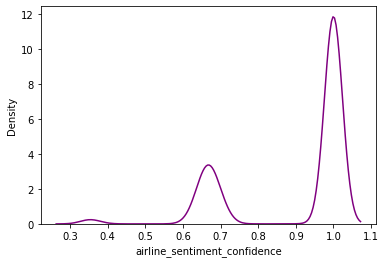

In [27]:
sns.kdeplot(data=data, x="airline_sentiment_confidence", color = "purple")
plt.show()

If we cluster people according to this column, I think 3 groups occur . This may be related to the 3 sentiments.

In [28]:
data.airline_sentiment_confidence.corr(data.airline_sentiment)

-0.20686558537074284

We failed, there is no correlation but okey! 


While drawing KDE, we don't need to normalize it, because they are all in the same range. 

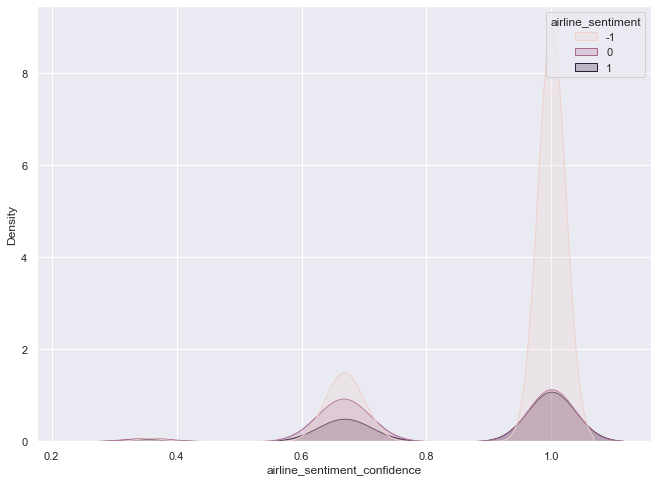

In [29]:
sns.set(rc={'figure.figsize':(11,8)})
sns.kdeplot(data=data, x="airline_sentiment_confidence", hue="airline_sentiment", fill =True)
plt.show()

The distributions of the sentiment confidence variable for the 0 and 1 sentiments are more similar. But it is higher than the others, especially for -1. 

### Negative Reason Column

In [30]:
print("We have {} unique values in negative reason columns.".format(data.negativereason.nunique()))
print("Our unique variables in this columnn are: ", data.negativereason.unique())

We have 10 unique values in negative reason columns.
Our unique variables in this columnn are:  [nan 'Bad Flight' "Can't Tell" 'Late Flight' 'Customer Service Issue'
 'Flight Booking Problems' 'Lost Luggage' 'Flight Attendant Complaints'
 'Cancelled Flight' 'Damaged Luggage' 'longlines']


In [31]:
pos_sent = data[data.airline_sentiment == 1 ]
neg_sent = data[data.airline_sentiment == -1 ]
neut_sent = data[data.airline_sentiment == 0 ]
print("We have {} negative reason in positive sentiments.".format(pos_sent.negativereason.count()))
print("We have {} negative reason in neutral sentiments.".format(neut_sent.negativereason.count()))
print("Negative reasons in negative sentiments:", neg_sent.negativereason.count())
print("Negative reasons in all data: ",data.negativereason.count())

We have 0 negative reason in positive sentiments.
We have 0 negative reason in neutral sentiments.
Negative reasons in negative sentiments: 9082
Negative reasons in all data:  9082


As we guessed, all negative causes are in columns with negative sentiments. 

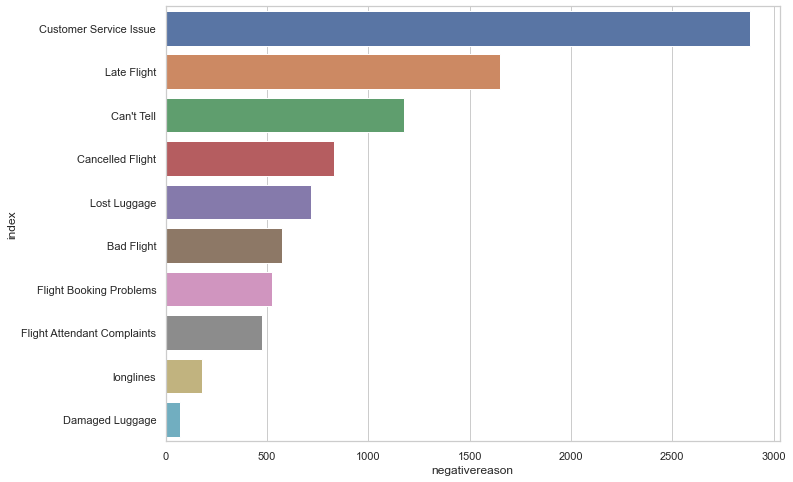

In [32]:
# count negative reasons
neg_reason_count = data.negativereason.value_counts()
# convert to df and reset index
neg_reason_count_df = pd.DataFrame(neg_reason_count)
neg_reason_count_df.reset_index(inplace=True)
#neg_reason_count_df = neg_reason_count_df.rename(columns = {'index':'reason'})
# plot reasons and counts
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="negativereason", y="index", data=neg_reason_count_df)

It seems that the most problematic issue is **Customer Service Issue** and this is what causes the most negative sentiments. 

In [33]:
print("Number of total negaitve sentimenst: ",neg_sent.shape[0])
print("Number of negative sentiments with negative reason: ",neg_sent.negativereason.isnull().value_counts())

Number of total negaitve sentimenst:  9082
Number of negative sentiments with negative reason:  False    9082
Name: negativereason, dtype: int64


This means that if the sentiment is negative, the negative reason column is full for each sentiment. 

Similarly, there is no column like positivereason. Perhaps the company providing the data wanted to focus on users' complaints reasons and resolve them. 

As we examine the Airlines column, we will go deeper and look at what the situation is like for different airlines. 

### Negative Reason Confidence Column

In [34]:
data.negativereason_confidence.describe()

count    10416.000000
mean         0.637874
std          0.330636
min          0.000000
25%          0.360375
50%          0.670600
75%          1.000000
max          1.000000
Name: negativereason_confidence, dtype: float64

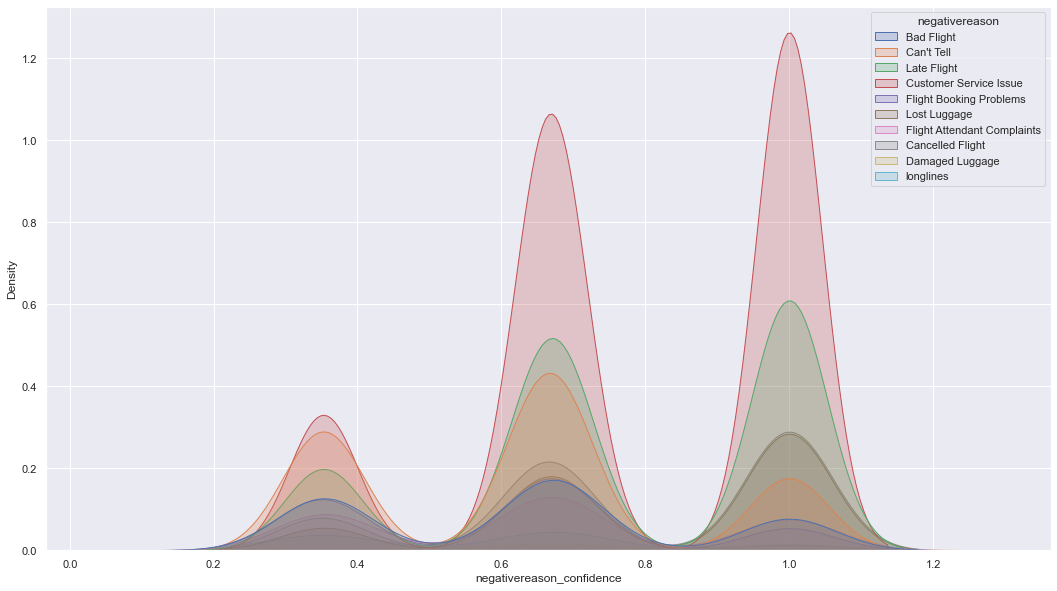

In [35]:
sns.set(rc={'figure.figsize':(18,10)})
sns.kdeplot(data=data, x="negativereason_confidence", hue="negativereason", fill =True)
plt.show()

### Airline Column

We have 6 different airlines.

In [36]:
data.airline.unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

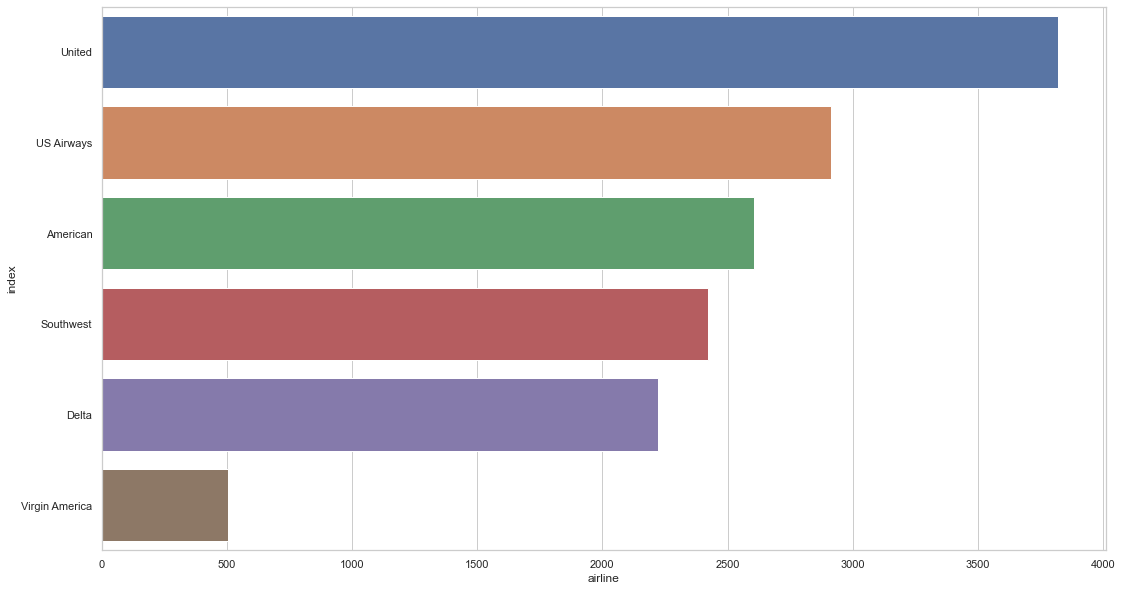

In [37]:
airline_counts = data.airline.value_counts()
airline_counts_df = pd.DataFrame(airline_counts)
airline_counts_df.reset_index(inplace=True)
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="airline", y="index", data=airline_counts_df);

We have tweets about United Airlines the most, and Virgin America Airlines the least. 

And we have no null raw for this column. Nice!

In [38]:
data.airline.isnull().sum()

0

### Let's investigate according to airlines 

### Sentiment distributions of different airlines

In [39]:
data.airline.unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [40]:
united_airline = data[data.airline == "United"]
virgin_america_airline = data[data.airline == "Virgin America"]
southwest_airline = data[data.airline == "Southwest"]
delta_airline = data[data.airline == "Delta"]
us_airways_airline = data[data.airline == "US Airways"]
american_airline = data[data.airline == "American"]

We created data for each airline to make an airline-based analysis. 

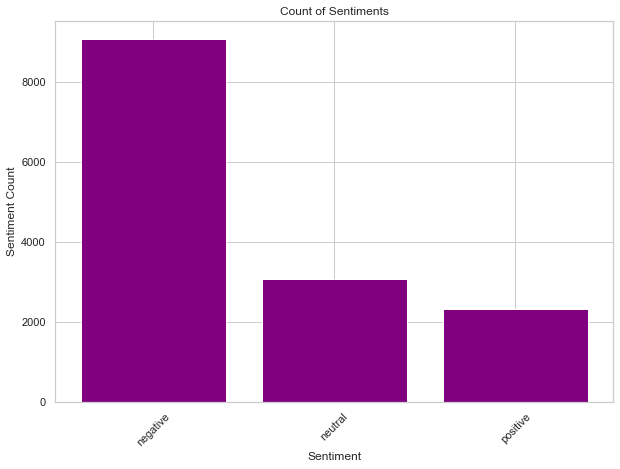

In [41]:
# Remember how disributed data by sentiments.
rcParams["figure.figsize"] = [10, 7]
index = [1,2,3]
plt.bar(index,sentiment_count, color ="purple")
plt.xticks(index,['negative','neutral','positive'],rotation=45)
plt.ylabel('Sentiment Count')
plt.xlabel('Sentiment')
plt.title('Count of Sentiments')
plt.show()

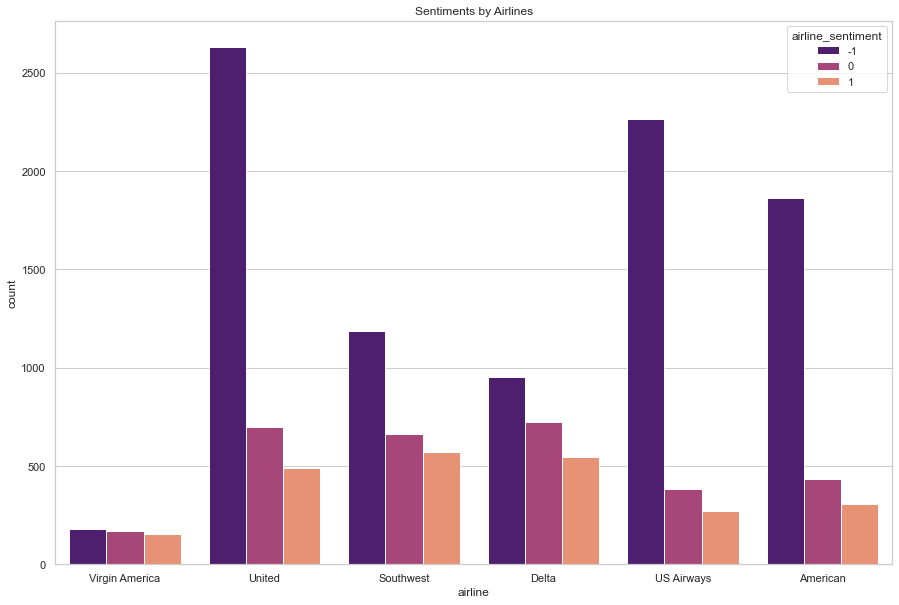

In [42]:
rcParams["figure.figsize"] = [15, 10]
sns.countplot(x = 'airline', hue = 'airline_sentiment', data = data, palette = 'magma')
plt.title('Sentiments by Airlines')
plt.show()

There is a huge difference between positive and negative sentiments in "United", "US Airways" and "American" airlines. 

There is less data on Virgin America, but the proportion of positive, neutral, and negative sentiments is close to each other. 

In [43]:
data.airline.unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [44]:
# Create empty df.
pos_neg_byairlines = pd.DataFrame()
#Insert airlines
idx = 0
new_col = ['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways','American']  # can be a list, a Series, an array or a scalar   
pos_neg_byairlines.insert(loc=idx, column='Airlines', value=new_col)

In [45]:
# Create pos/ neg/ neut sent. variables for all airlines 
pos_virgin = virgin_america_airline[virgin_america_airline.airline_sentiment == 1].shape[0]
neg_virgin = virgin_america_airline[virgin_america_airline.airline_sentiment == -1].shape[0]
neut_virgin = virgin_america_airline[virgin_america_airline.airline_sentiment == 0].shape[0]

pos_united = united_airline[united_airline.airline_sentiment == 1].shape[0]
neg_united = united_airline[united_airline.airline_sentiment == -1].shape[0]
neut_united = united_airline[united_airline.airline_sentiment == 0].shape[0]


pos_southwest = southwest_airline[southwest_airline.airline_sentiment == 1].shape[0]
neg_southwest = southwest_airline[southwest_airline.airline_sentiment == -1].shape[0]
neut_southwest = southwest_airline[southwest_airline.airline_sentiment == 0].shape[0]


pos_delta = delta_airline[delta_airline.airline_sentiment == 1].shape[0]
neg_delta = delta_airline[delta_airline.airline_sentiment == -1].shape[0]
neut_delta = delta_airline[delta_airline.airline_sentiment == 0].shape[0]


pos_us_airways = us_airways_airline[us_airways_airline.airline_sentiment == 1].shape[0]
neg_us_airways = us_airways_airline[us_airways_airline.airline_sentiment == -1].shape[0]
neut_us_airways = us_airways_airline[us_airways_airline.airline_sentiment == 0].shape[0]


pos_american = american_airline[american_airline.airline_sentiment == 1].shape[0]
neg_american = american_airline[american_airline.airline_sentiment == -1].shape[0]
neut_american = american_airline[american_airline.airline_sentiment == 0].shape[0]

# Create pos column.
idx = 1
pos_col = [pos_virgin, pos_united, pos_southwest, pos_delta, pos_us_airways,pos_american]   
pos_neg_byairlines.insert(loc=idx, column='Pos', value=pos_col)

# Create neg column.
idx = 2
neg_col = [neg_virgin, neg_united, neg_southwest, neg_delta, neg_us_airways,neg_american]
pos_neg_byairlines.insert(loc=idx, column='Neg', value=neg_col)

# Create neut column.
idx = 3
neut_col = [neut_virgin, neut_united, neut_southwest, neut_delta, neut_us_airways, neut_american]  # can be a list, a Series, an array or a scalar   
pos_neg_byairlines.insert(loc=idx, column='Neut', value=neut_col)

In [46]:
# We finally created df.
pos_neg_byairlines

,Airlines,Pos,Neg,Neut
0,Virgin America,152,181,171
1,United,492,2633,697
2,Southwest,570,1186,664
3,Delta,544,955,723
4,US Airways,269,2263,381
5,American,307,1864,433


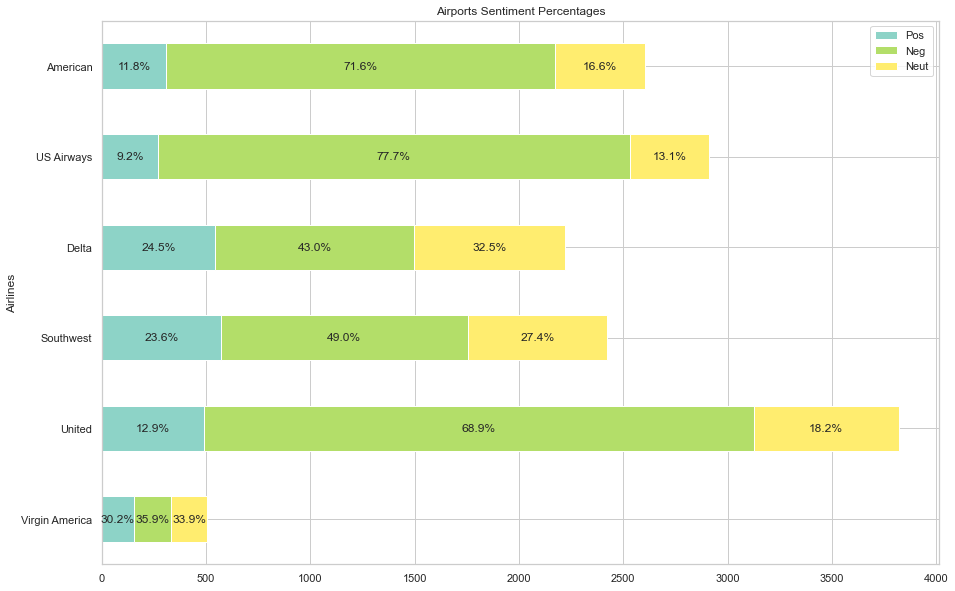

In [47]:
# Plot percentages.
pos_neg_byairlines.plot( 
  x = 'Airlines',  
  kind = 'barh',  
  stacked = True,  
  title = 'Airports Sentiment Percentages',  
  mark_right = True,
  cmap = "Set3") 

df_total = pos_neg_byairlines["Pos"] + pos_neg_byairlines["Neg"] + pos_neg_byairlines["Neut"] 
df_rel = pos_neg_byairlines[pos_neg_byairlines.columns[1:]].div(df_total, 0)*100
  
for n in df_rel: 
    for i, (cs, ab, pc) in enumerate(zip(pos_neg_byairlines.iloc[:, 1:].cumsum(1)[n],  
                                         pos_neg_byairlines[n], df_rel[n])): 
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%',  
                 va = 'center', ha = 'center')

Most unbalanced airline is American and US Airways airline.

Virgin America still balanced.

- When we look at the percentages, the highest rate of positive comments: Virgin America. Lowest rate of positive comments: US Airways.

- The highest rate of negative comments: US Airways. Lowest rate of negative comments: Virgin America.

- The highest rate of neutral comments: Virgin America. Lowest rate of negative comments: US Airways.


### Negative reasons of airlines

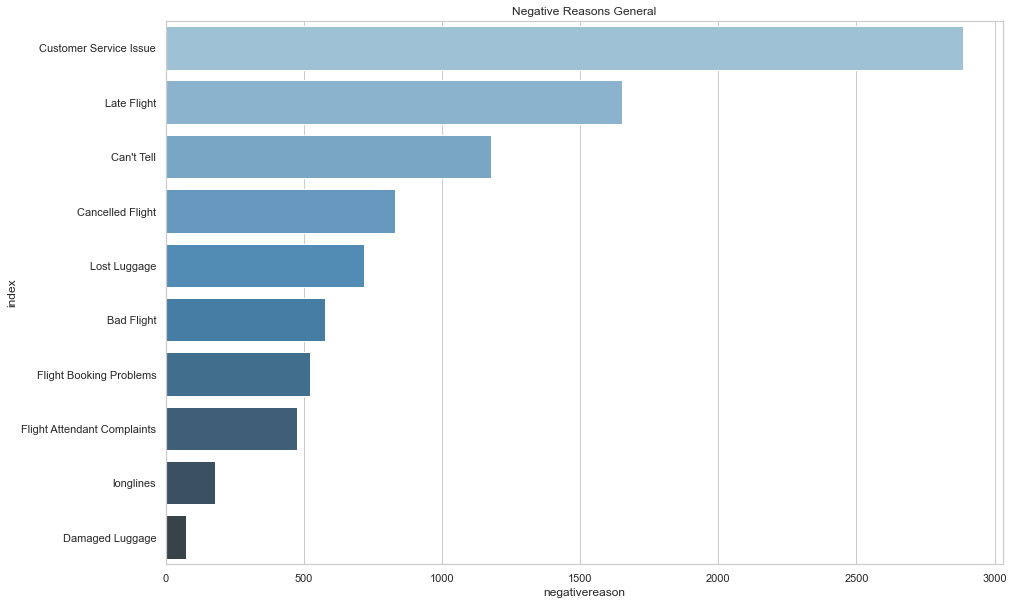

In [48]:
# count negative reasons
neg_reason_count = data.negativereason.value_counts()
# convert to df and reset index
neg_reason_count_df = pd.DataFrame(neg_reason_count)
neg_reason_count_df.reset_index(inplace=True)
#neg_reason_count_df = neg_reason_count_df.rename(columns = {'index':'reason'})
# plot reasons and counts
sns.set_theme(style="whitegrid")
plt.title("Negative Reasons General")
sns.barplot(x="negativereason", y="index", data=neg_reason_count_df, palette = 'Blues_d')
rcParams["figure.figsize"] = [8, 5]
plt.show()

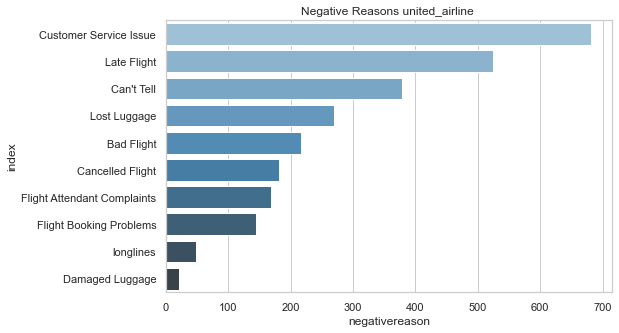

In [49]:
# count negative reasons for united airline
neg_reason_count_united_airline = united_airline.negativereason.value_counts()
neg_reason_count_df_united_airline = pd.DataFrame(neg_reason_count_united_airline)
neg_reason_count_df_united_airline.reset_index(inplace=True)
sns.set_theme(style="whitegrid")
plt.title("Negative Reasons united_airline ")
sns.barplot(x="negativereason", y="index", data=neg_reason_count_df_united_airline, palette = 'Blues_d')
rcParams["figure.figsize"] = [8, 5]
plt.show()

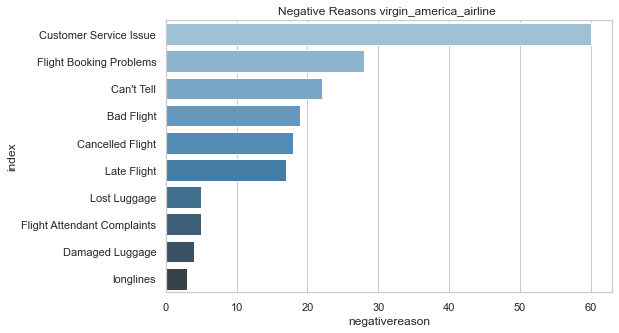

In [50]:
# count negative reasons for virgin america
neg_reason_count_virgin_america_airline = virgin_america_airline.negativereason.value_counts()
neg_reason_count_df_virgin_america = pd.DataFrame(neg_reason_count_virgin_america_airline)
neg_reason_count_df_virgin_america.reset_index(inplace=True)
sns.set_theme(style="whitegrid")
plt.title("Negative Reasons virgin_america_airline ")
sns.barplot(x="negativereason", y="index", data=neg_reason_count_df_virgin_america, palette = 'Blues_d')
rcParams["figure.figsize"] = [8, 5]
plt.show()

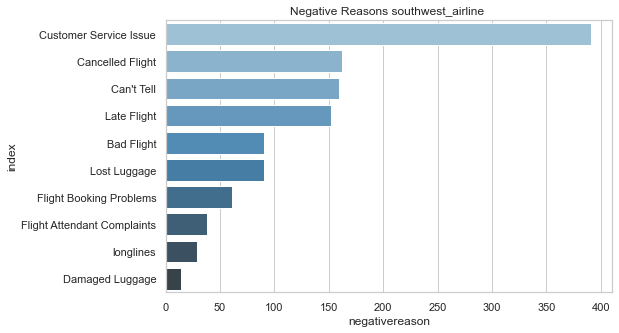

In [51]:
# for southwest_airline
neg_reason_count_southwest_airline = southwest_airline.negativereason.value_counts()
neg_reason_count_df_southwest_airline = pd.DataFrame(neg_reason_count_southwest_airline)
neg_reason_count_df_southwest_airline.reset_index(inplace=True)
sns.set_theme(style="whitegrid")
plt.title("Negative Reasons southwest_airline ")
sns.barplot(x="negativereason", y="index", data=neg_reason_count_df_southwest_airline, palette = 'Blues_d')
rcParams["figure.figsize"] = [8, 5]
plt.show()

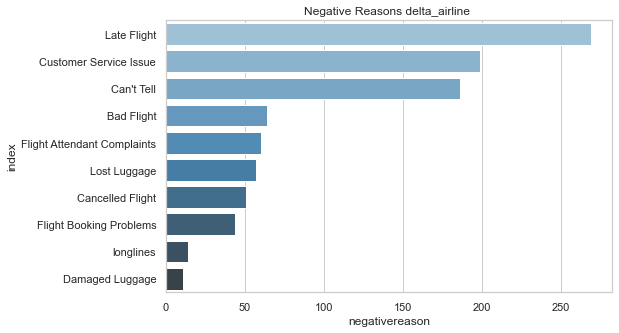

In [52]:
# for delta_airline
neg_reason_count_delta_airline = delta_airline.negativereason.value_counts()
neg_reason_count_df_delta_airline = pd.DataFrame(neg_reason_count_delta_airline)
neg_reason_count_df_delta_airline.reset_index(inplace=True)
sns.set_theme(style="whitegrid")
plt.title("Negative Reasons delta_airline ")
sns.barplot(x="negativereason", y="index", data=neg_reason_count_df_delta_airline, palette = 'Blues_d')
rcParams["figure.figsize"] = [8, 5]
plt.show()

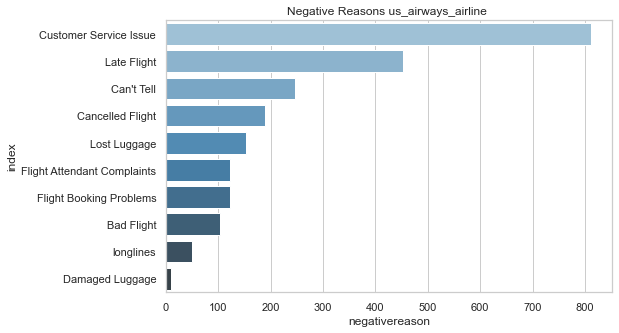

In [53]:
# for us_airways_airline
neg_reason_count_us_airways_airline = us_airways_airline.negativereason.value_counts()
neg_reason_count_df_us_airways_airline = pd.DataFrame(neg_reason_count_us_airways_airline)
neg_reason_count_df_us_airways_airline.reset_index(inplace=True)
sns.set_theme(style="whitegrid")
plt.title("Negative Reasons us_airways_airline ")
sns.barplot(x="negativereason", y="index", data=neg_reason_count_df_us_airways_airline, palette = 'Blues_d')
rcParams["figure.figsize"] = [8, 5]
plt.show()

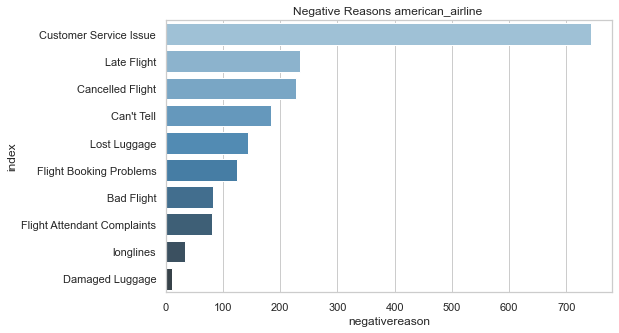

In [54]:
# for american_airline
neg_reason_count_american_airline = american_airline.negativereason.value_counts()
neg_reason_count_df_american_airline = pd.DataFrame(neg_reason_count_american_airline)
neg_reason_count_df_american_airline.reset_index(inplace=True)
sns.set_theme(style="whitegrid")
plt.title("Negative Reasons american_airline ")
sns.barplot(x="negativereason", y="index", data=neg_reason_count_df_american_airline, palette = 'Blues_d')
rcParams["figure.figsize"] = [8, 5]
plt.show()

As a meaningful difference, the lost luggage problem in united airline occurred more than the general.

- And Virgin America has a flight booking problem in top 3.

- And Southwest Airline has a cancelled flight problem in top 3.

- Also cancelled flight is important issue for American Airline.

- Delta Airlines most important problem is late flight.

Which problem is more important for which airline? We sorted the problems to see this, but the number of occurrences of the problems is different. For now, there is no need to go to an association on this issue. 

### Let we explore airline_sentiment_gold column

In [55]:
data.airline_sentiment_gold.unique()

array([nan, 'negative', 'neutral', 'positive'], dtype=object)

In [56]:
data.airline_sentiment_gold.value_counts()

negative    32
positive     5
neutral      3
Name: airline_sentiment_gold, dtype: int64

In [57]:
data.airline_sentiment_gold.isnull().value_counts()

True     14445
False       40
Name: airline_sentiment_gold, dtype: int64

In [58]:
#[data[data.airline_sentiment_gold == "negative"].airline_sentiment]

In [59]:
#[data[data.airline_sentiment_gold == "positive"].airline_sentiment]

In [60]:
#[data[data.airline_sentiment_gold == "neutral"].airline_sentiment]

Negatives signify negative sentimens, positive ones signify positive sentiments, neutral ones signify neutral sentiments. 

This column is mostly empty. I will drop this.




In [61]:
del data["airline_sentiment_gold"]

### Retweet Count

In [62]:
data.retweet_count.describe()

count    14485.000000
mean         0.083397
std          0.749632
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         44.000000
Name: retweet_count, dtype: float64

In [63]:
data.shape

(14485, 14)

In [64]:
data.retweet_count.isnull().value_counts()

False    14485
Name: retweet_count, dtype: int64

In [65]:
print("Number of 0 retweets: ",data[data.retweet_count == 0 ].retweet_count.value_counts())

Number of 0 retweets:  0    13720
Name: retweet_count, dtype: int64


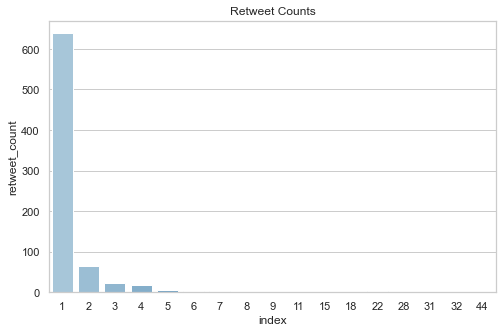

In [66]:
retweet_count = data.retweet_count.value_counts()
retweet_count_df = pd.DataFrame(retweet_count)
retweet_count_df.reset_index(inplace=True)
retweet_count_df = retweet_count_df[retweet_count_df.index != 0]
sns.set_theme(style="whitegrid")
plt.title("Retweet Counts")
sns.barplot(x= "index", y="retweet_count", data=retweet_count_df, palette = 'Blues_d')
rcParams["figure.figsize"] = [8, 5]
plt.show()

In [67]:
data.retweet_count.unique()

array([ 0,  1,  2,  3,  4,  5,  7, 22,  6, 18, 15, 31, 11,  8,  9, 28, 32,
       44])

In [68]:
data[data.retweet_count == 44]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
11596,567897883875217408,-1,1.0,Late Flight,1.0,US Airways,OBJ_3,NaN,44,@USAirways 5 hr flight delay and a delay when ...,NaN,2015-02-17 20:06:21 -0800,NaN,Eastern Time (US & Canada)


In [69]:
data[data.retweet_count == 32].text

11582    @USAirways of course never again tho . Thanks ...
Name: text, dtype: object

sns.kdeplot(data=data, x="retweet_count")
plt.show()

We have missing value. If there is no retweet, the value 0 is given. 

Most of the data has not been retweeted. 

There are max 44 retweets and usually this is about US Airlines.

In [70]:
data[data.retweet_count != 0].airline_sentiment.value_counts()

-1    595
 0     94
 1     76
Name: airline_sentiment, dtype: int64

In [71]:
data[data.retweet_count != 0].airline.value_counts()
# yüzdeliklerine bakmak daha mantıklı.

United            379
US Airways        119
Delta              92
Southwest          86
American           74
Virgin America     15
Name: airline, dtype: int64

In [72]:
data[data.retweet_count != 0].tweet_location.value_counts().head()

Chicago, IL       11
New York, NY      11
Washington, DC    10
Belleville         9
Chicago            8
Name: tweet_location, dtype: int64

Usually, the sentiments of the retweeted tweets are negative.


Generally, retweeted tweets about United and US Airlines.

Generally people tweeted from NY, Chicage and Washington.

### Tweet Coord Column

In [73]:
data.tweet_coord.nunique()

832

We have 832 different coordination.

In [74]:
data.tweet_coord.unique()[1]

'[40.74804263, -73.99295302]'

Maybe we can see where and which sentiment tweeted later. However, we will not focus on this right now.

### Tweet Created

In [75]:
print("Beginning of date: ",data.tweet_created.min())
print("End of date: ",data.tweet_created.max())

Beginning of date:  2015-02-16 23:36:05 -0800
End of date:  2015-02-24 11:53:37 -0800


In [76]:
data.tweet_created.isnull().sum()

0

No missing value!


We will select first 20 character and convert to datetime type.

In [77]:
data.tweet_created.dtype

dtype('O')

In [78]:
data['date'] = data["tweet_created"].astype(str).str[0:20]

In [79]:
data['date']= pd.to_datetime(data['date'])

In [80]:
data.date

0       2015-02-24 11:35:52
1       2015-02-24 11:15:59
2       2015-02-24 11:15:48
3       2015-02-24 11:15:36
4       2015-02-24 11:14:45
                ...        
14635   2015-02-22 12:01:01
14636   2015-02-22 11:59:46
14637   2015-02-22 11:59:15
14638   2015-02-22 11:59:02
14639   2015-02-22 11:58:51
Name: date, Length: 14485, dtype: datetime64[ns]

In [81]:
# Drop unusefull column.
del data["tweet_created"]

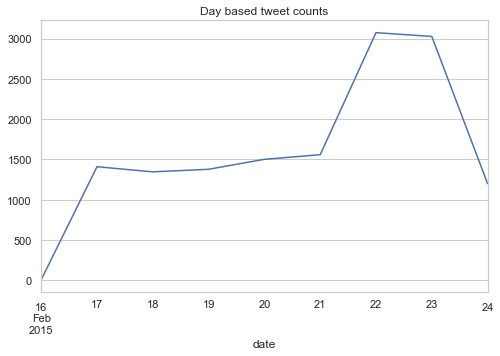

In [82]:
data["tweet_id"].groupby(data["date"].dt.to_period('d')).count().plot(kind='line')
plt.title("Day based tweet counts")
rcParams["figure.figsize"] = [10, 5]
plt.show()

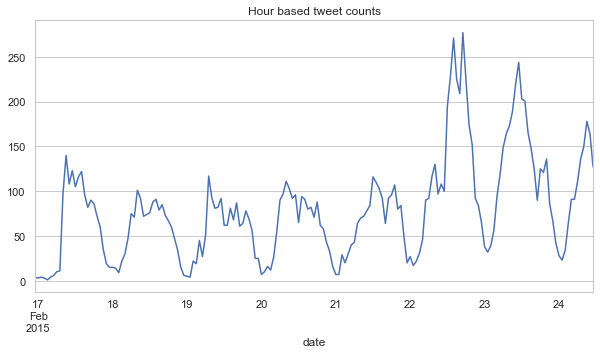

In [83]:
data["tweet_id"].groupby(data["date"].dt.to_period('h')).count().plot(kind='line')
plt.title("Hour based tweet counts")
rcParams["figure.figsize"] = [10, 5]
plt.show()

In [84]:
# Create hour column.
data['datehour'] = data['date'].dt.hour
data.datehour.nunique()

24

People's moods and tweeting intensity can vary day and night.


I created the day_night column. 0 represents night and 1 day.

In [85]:
data['day_night'] = 0
data['day_night'].loc[(data['datehour'] >= 6) & (data['datehour'] <= 18)] = 1

In [86]:
print("Number of tweets posted at night: ",data[data['day_night'] == 0].airline_sentiment.count())
print("Number of tweets posted at day: ",data[data['day_night'] == 1].airline_sentiment.count())

Number of tweets posted at night:  3675
Number of tweets posted at day:  10810


In [87]:
data[data['day_night'] == 0].airline_sentiment.value_counts()

-1    2497
 0     673
 1     505
Name: airline_sentiment, dtype: int64

In [88]:
data[data['day_night'] == 1].airline_sentiment.value_counts()

-1    6585
 0    2396
 1    1829
Name: airline_sentiment, dtype: int64

People are more active during daylight hours. 


However, the negative rate of tweets posted at night is higher than those posted during the day.

In [89]:
data[data["retweet_count"] >=10].day_night.head()

5607    1
7027    1
7111    1
7115    1
7132    1
Name: day_night, dtype: int64

The highly retweeted tweets were usually posted during the daytime.

### User Timezone

There are 85 different timezones. This means that there are people from different cultures. 


We can list people as Americans and non-Americans. Thus, we can see if there is a difference in satisfaction between native people and non-native people.


In [90]:
print("Number of unique timezones: ",data.user_timezone.nunique())
print("Number of missing vales: ",data.user_timezone.isnull().sum())

Number of unique timezones:  85
Number of missing vales:  4775


In [91]:
data.user_timezone.unique()

array(['Eastern Time (US & Canada)', 'Pacific Time (US & Canada)',
       'Central Time (US & Canada)', 'America/New_York',
       'Atlantic Time (Canada)', 'Quito', nan,
       'Mountain Time (US & Canada)', 'Vienna', 'Caracas', 'Kuala Lumpur',
       'Brisbane', 'Arizona', 'London', 'Tehran', 'Alaska', 'Sydney',
       'Irkutsk', 'Santiago', 'Amsterdam', 'Tijuana', 'Abu Dhabi',
       'Central America', 'Edinburgh', 'Jerusalem', 'Hawaii', 'Paris',
       'Guam', 'New Delhi', 'Stockholm', 'America/Chicago', 'Berlin',
       'Madrid', 'Athens', 'Brussels', 'Taipei', 'Rome', 'Beijing',
       'Mexico City', 'Bern', 'Singapore', 'Indiana (East)', 'Melbourne',
       'Saskatchewan', 'Casablanca', 'Brasilia', 'Kyiv', 'Bucharest',
       'Greenland', 'Prague', 'New Caledonia', 'Bogota', 'Seoul',
       'Sarajevo', 'Wellington', 'Bangkok', 'Warsaw', 'Copenhagen',
       'Hong Kong', 'Guadalajara', 'Mid-Atlantic', 'Mazatlan',
       'Buenos Aires', 'America/Los_Angeles', 'Dublin', 'Lisbon',
 

In the Native column, 1 are represent natives, 0 foreigners.

**Assumption:**


Why is this important?

Foreign people may only use this service a few times. However, locals will use this service more for transportation. 

Even though the number is the same as a person, locals can bring more money in terms of usage.

In [92]:
# Create list for foreing timezones.
forein_list = ['Quito', 'Vienna', 'Caracas', 'Kuala Lumpur', 'Brisbane',  'London', 'Tehran', 'Sydney', 'Irkutsk', 'Amsterdam',  'Santiago', 'Tijuana', 'Abu Dhabi','Edinburgh',  'Jerusalem','Paris',
'Guam', 'New Delhi', 'Stockholm', 'Berlin', 'Madrid', 'Athens', 'Brussels', 'Taipei', 'Rome','Beijing','Mexico City', 'Bern', 'Singapore',  'Saskatchewan', 'Casablanca', 'Brasilia', 'Kyiv','Bucharest','Prague','Seoul', 'Sarajevo', 'Bangkok', 'Warsaw', 'Copenhagen', 
'Hong Kong','Buenos Aires', 'Dublin', 'Lisbon','Newfoundland', 'Tokyo', 'Midway Island', 'Istanbul',  'Solomon Is.',  'Adelaide', 'Nairobi', 'Islamabad', 'Helsinki','Lima', 'Pretoria', 'West Central Africa', 
'Canberra','Perth', 'La Paz']


# Create list for native timezones.
native_list = ['Eastern Time (US & Canada)', 'Pacific Time (US & Canada)','Central Time (US & Canada)', 'America/New_York','Atlantic Time (Canada)', 'Mountain Time (US & Canada)', 'Arizona',  'Alaska', 'Central America', 'Hawaii', 'America/Chicago', 'Indiana (East)', 'Melbourne','Greenland',  'New Caledonia', 'Bogota','Wellington', 
'Guadalajara', 'Mazatlan','America/Los_Angeles', 'Monterrey',  'America/Detroit','America/Atikokan','America/Boise']

# Create native columns.
def fill(row):
    if row['user_timezone'] in forein_list:
        return 0
    else:
        return 1
data['native'] = data.apply(fill, axis=1)

In [93]:
data.native.isnull().sum()

0

In [94]:
data.native.unique()

array([1, 0])

In [95]:
print("Native peoples total tweets: ",data[data['native'] == 1].airline_sentiment.count())
print("Foreign peoples total tweets: ",data[data['native'] == 0].airline_sentiment.count())
# data.groupby("native")["airline_sentiment"].count()

Native peoples total tweets:  13057
Foreign peoples total tweets:  1428


In [96]:
data[data['native'] == 1].airline_sentiment.value_counts() 

-1    8222
 0    2689
 1    2146
Name: airline_sentiment, dtype: int64

In [97]:
data[data['native'] == 0].airline_sentiment.value_counts() 

-1    860
 0    380
 1    188
Name: airline_sentiment, dtype: int64

- Native people tweet more than foreigners, which means they are more interested. 


- The negatives are close in proportion.


- For native people, the ratio of positives is close to neutral. 

- But for foreigns, neutral sentients are more than positives. 

### Finally text column  🚀🚀

The text we have is made up of tweets with punctuations, links,... First of all, we have to **clean** them. 

In [98]:
# Before preprocessing
data.text[100]

'@VirginAmerica trying to add my boy Prince to my ressie. SF this Thursday @VirginAmerica from LAX http://t.co/GsB2J3c4gM'

In [99]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/skaraderili/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Cleaning

![](b164a29466ce34748e1aae7468a8f8bf.png)

In [100]:
data.shape

(14485, 17)

In [101]:
lemma = nlp.WordNetLemmatizer()
def preprocess(x):
    x = str(x)   #convert all of them to str
    x = re.sub("[^a-zA-z]", " ",x)
    x = x.lower()
    x = nlp.word_tokenize(x)   # Tokenize
    #x = [i for i in x if not i in set(stopwords.words("english"))] #slowly
    x = [lemma.lemmatize(i) for  i in x]   #lemmatization
    x = " ".join(x)
    return x

data.text = data.text.apply(preprocess)

In [102]:
# After preprocessing
data.text[100]

'virginamerica trying to add my boy prince to my ressie sf this thursday virginamerica from lax http t co gsb j c gm'

In [102]:
data.airline.unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

### Removing Stopwords



Stopwords are some of the most frequently occuring words e.g. 'a','an','the'. They does not give any significant information regarding the content and context of text.

In [103]:
# We'll remove stopwords with using nltk library.
stopwords = nltk.corpus.stopwords.words('english')
stopword = set(stopwords)
stopword = stopword.union(set(['a', 'i', 'mr', 'ms', 'mrs', 'one', 'two', 'said', 'br',"''","'", 'virginamerica', 'united', 'southwest', 'delta', 'usairways','american','americanair',"southwestair","wa","u","http"]))
data["text"] = data["text"].apply(lambda x: " ".join(x for x in x.split() if x not in stopword))

People have mentioned it like: @airline.

I've also removed these from the text along with the stopwords. 

### Delete the less common words 
**Assumption:** If a word is written less than 10 times in the whole data, that word is misspelled. 

In [104]:
# Calculate the frequency of words.
word_freq = (data["text"].str.split(expand =True)
      .stack()
      .value_counts()
      .rename_axis('vals')
      .reset_index(name ='count'))
# Add less than 10 entries to the set.
del_word = set(word_freq[word_freq["count"] <= 10].vals)

# Remove.
data["text"] = data["text"].apply(lambda x: " ".join(x for x in x.split() if x not in del_word))

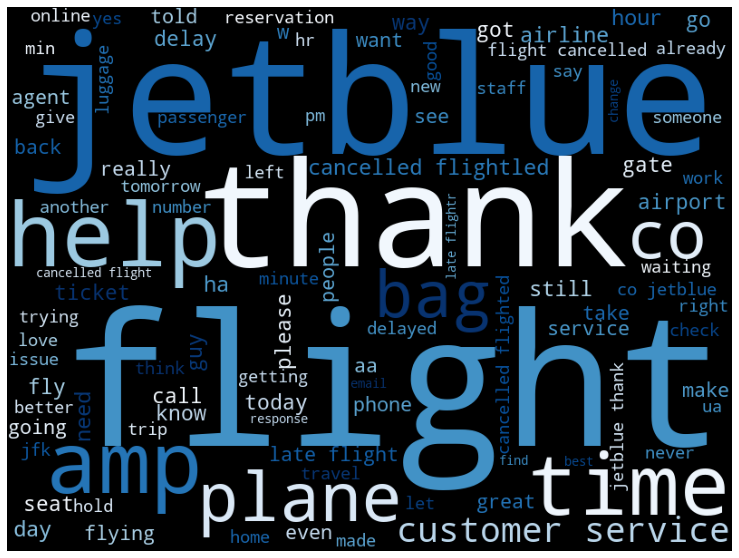

In [105]:
# WORD CLOUD 
cloud=WordCloud(width=800, height=600,colormap="Blues",stopwords = STOPWORDS, background_color = 'black', max_words = 100).generate(" ".join(data["text"])) 
# join can  merge all words into one string. like corpus.
plt.figure(figsize=(15,10))
plt.imshow(cloud)
plt.axis('off')
plt.show()

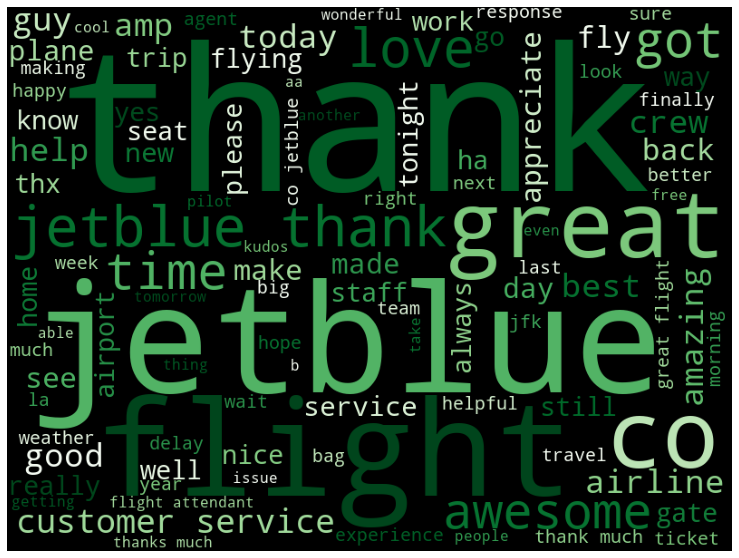

In [106]:
# Word cloud for positive labelled sentiments
train_positive = data[data.airline_sentiment == 1]
cloud=WordCloud(width=800, height=600,colormap="Greens",stopwords = STOPWORDS, background_color = 'black',max_words = 100).generate(" ".join(train_positive["text"])) 
# join can  merge all words into one string. like corpus.
plt.figure(figsize=(15,10))
plt.imshow(cloud)
plt.axis('off')
plt.show()

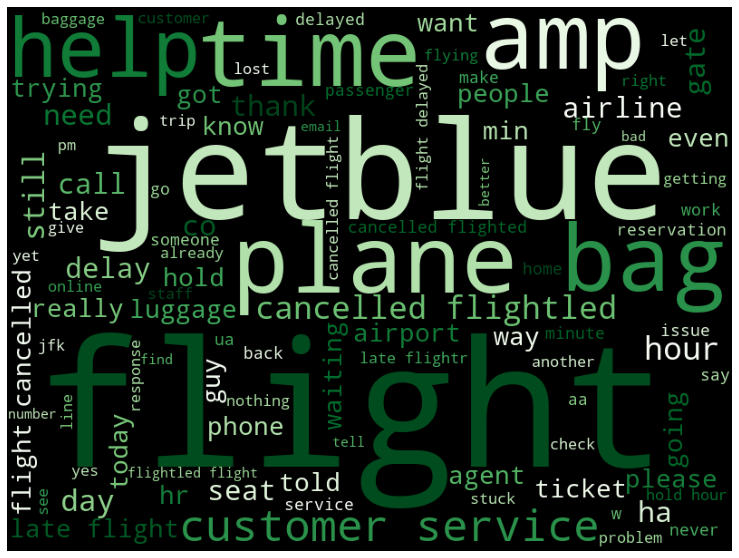

In [107]:
# Word cloud for neg labelled sentiments
train_neg = data[data.airline_sentiment == -1]
cloud=WordCloud(width=800, height=600,colormap="Greens",stopwords = STOPWORDS, background_color = 'black',max_words = 100).generate(" ".join(train_neg["text"])) 
# join can  merge all words into one string. like corpus.
plt.figure(figsize=(15,10))
plt.imshow(cloud)
plt.axis('off')
plt.show()

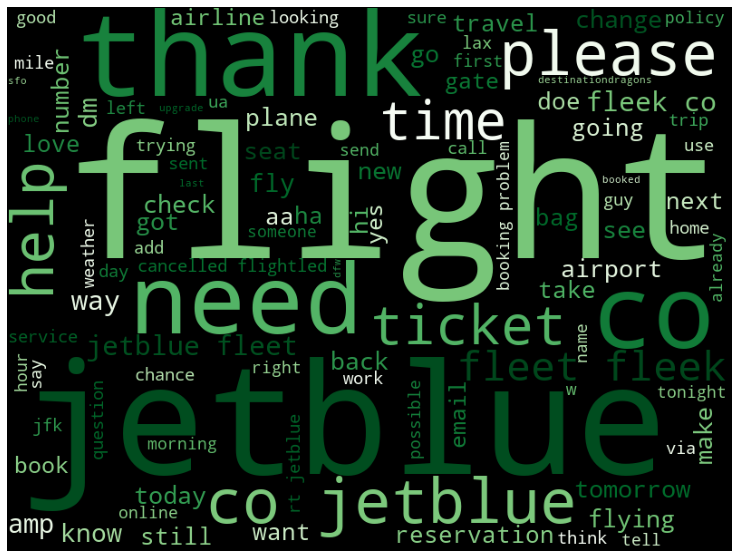

In [108]:
# Word cloud for neg labelled sentiments
train_neutral = data[data.airline_sentiment == 0]
cloud=WordCloud(width=800, height=600,colormap="Greens",stopwords = STOPWORDS, background_color = 'black',max_words = 100).generate(" ".join(train_neutral["text"])) 
# join can  merge all words into one string. like corpus.
plt.figure(figsize=(15,10))
plt.imshow(cloud)
plt.axis('off')
plt.show()

It's easier to turn neutral comments into positive than negatives.

Maybe we can look at what emerges in the neutral interpretation and see why people don't have more positive thoughts. 

**need** seems like an important word in this objective. 

### Len of tweet and number of word

In [109]:
# get lenght and create len_review column. and compare sentiments by lenght of reviews.
data["len_review"] = data.text.str.len()
# number of words per tweet.

# Creaye wordn_n feature. number of words per tweet.
data['word_n'] = data['text'].apply(lambda x : len(x.split(' ')))

In [110]:
print("Desc. of positive sentiments:\n",data[data.airline_sentiment == 1].len_review.describe())

Desc. of positive sentiments:
 count    2334.000000
mean       37.785347
std        21.697640
min         0.000000
25%        20.000000
50%        36.000000
75%        53.000000
max       115.000000
Name: len_review, dtype: float64


In [111]:
print("Desc. of negative sentiments:\n",data[data.airline_sentiment == -1].len_review.describe())

Desc. of negative sentiments:
 count    9082.000000
mean       51.732658
std        20.601608
min         0.000000
25%        38.000000
50%        53.000000
75%        66.000000
max       126.000000
Name: len_review, dtype: float64


In [112]:
print("Desc. of neutral sentiments:\n",data[data.airline_sentiment == 0].len_review.describe())

Desc. of neutral sentiments:
 count    3069.000000
mean       35.829586
std        20.869667
min         0.000000
25%        20.000000
50%        33.000000
75%        51.000000
max       108.000000
Name: len_review, dtype: float64


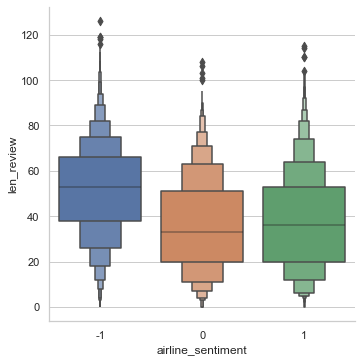

In [113]:
sns.catplot(x="airline_sentiment", y="len_review",  kind="boxen", data=data)
plt.show()

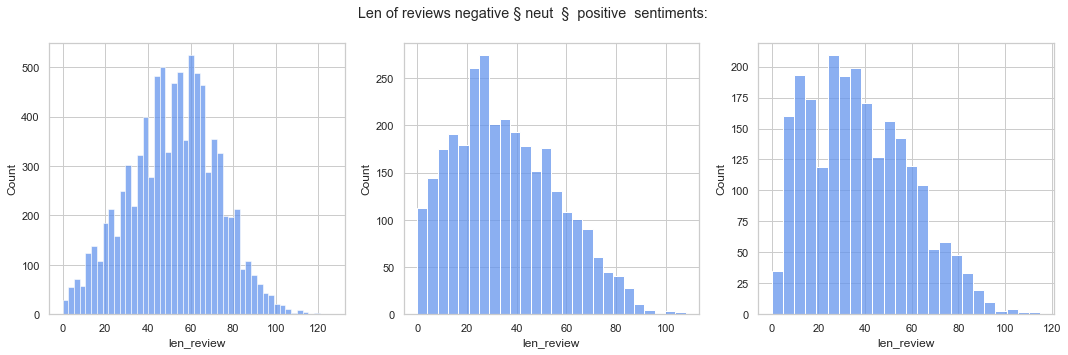

In [114]:
fig, axe = plt.subplots(1,3, figsize=(18,5))

# fig.add_subplot(1,3,1)
sns.histplot((data[data.airline_sentiment == -1].len_review),color = "cornflowerblue",ax=axe[0])
fig.suptitle("Len of reviews negative § neut  §  positive  sentiments: ")
# fig.add_subplot(1,2,1)

sns.histplot((data[data.airline_sentiment == 0].len_review),color = "cornflowerblue", ax=axe[1])

sns.histplot((data[data.airline_sentiment == 1].len_review),color = "cornflowerblue",ax=axe[2])


plt.show()

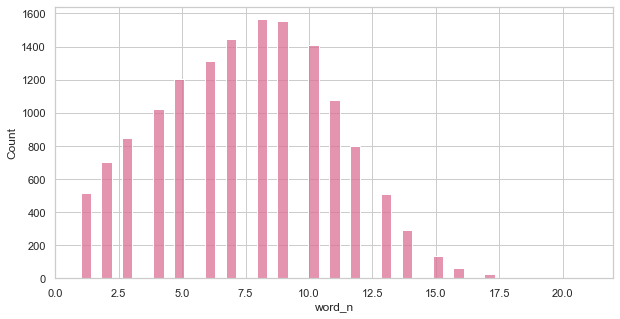

In [115]:
sns.histplot((data.word_n),color='palevioletred')
plt.show()

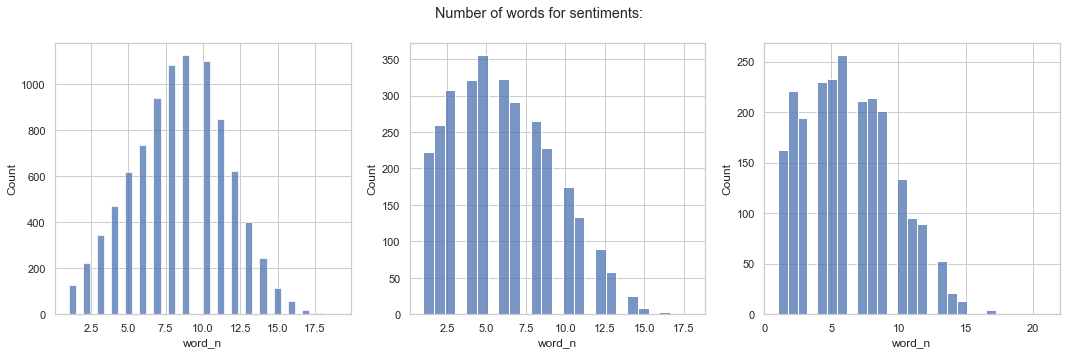

In [116]:
fig=plt.figure(figsize=(18,5))
fig.suptitle("Number of words for sentiments: ")

fig.add_subplot(1,3,1)
sns.histplot(data[data.airline_sentiment== -1].word_n)

fig.add_subplot(1,3,2)
sns.histplot(data[data.airline_sentiment== 0].word_n)

fig.add_subplot(1,3,3)
sns.histplot(data[data.airline_sentiment== 1].word_n)

plt.show()

- Positive and neutral tweets have a similar distribution.

- Negative tweets appear to be written longer. Outlier values are here.

- Our data is unbalanced and negative values are dense so there is a distribution that looks like negative in general. 

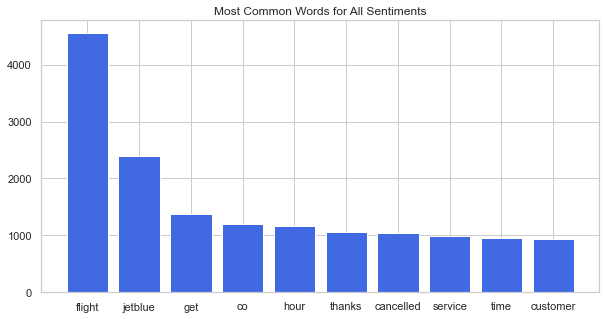

In [117]:
# Create most common words data.
most_common_words = pd.DataFrame(Counter(" ".join(data["text"]).split()).most_common(10),columns=['word','count'])
# And plot them.
plt.bar(most_common_words["word"],most_common_words["count"], color = 'royalblue')
plt.title("Most Common Words for All Sentiments")
plt.show()

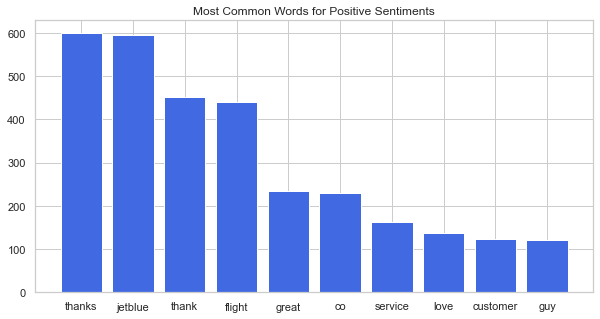

In [118]:
# Create most common words for positive sent.
most_common_words_positive = pd.DataFrame(Counter(" ".join(data[data.airline_sentiment == 1].text).split()).most_common(10),columns=['word','count_pos'])
# Plot.
plt.bar(most_common_words_positive["word"],most_common_words_positive["count_pos"], color = 'royalblue')
plt.title("Most Common Words for Positive Sentiments")
plt.show()
# thanks = ?thank

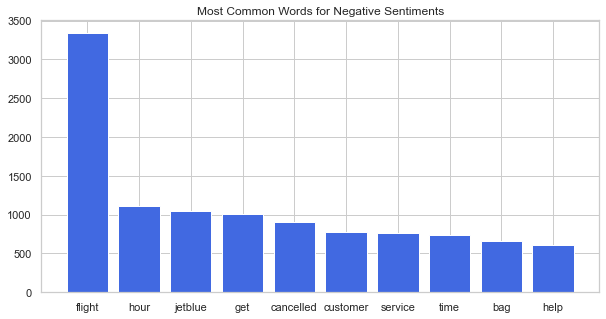

In [119]:
# Create most common words for positive sent.
most_common_words_neg = pd.DataFrame(Counter(" ".join(data[data.airline_sentiment == -1].text).split()).most_common(10),columns=['word','count_pos'])
# Plot.
plt.bar(most_common_words_neg["word"],most_common_words_neg["count_pos"], color = 'royalblue')
plt.title("Most Common Words for Negative Sentiments")
plt.show()

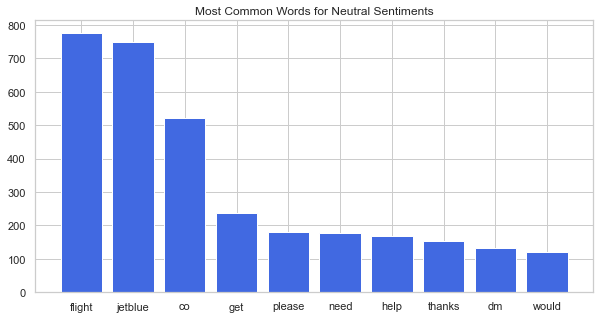

In [120]:
# Create most common words for positive sent.
most_common_words_neut = pd.DataFrame(Counter(" ".join(data[data.airline_sentiment == 0].text).split()).most_common(10),columns=['word','count_pos'])
# Plot.
plt.bar(most_common_words_neut["word"],most_common_words_neut["count_pos"], color = 'royalblue')
plt.title("Most Common Words for Neutral Sentiments")
plt.show()

In [121]:
# convert to categorical Categority by using one hot  
df_dummy = data.copy()
df_dummy.airline = pd.Categorical(df_dummy.airline)
x = df_dummy[['airline']]
del df_dummy['airline']
dummies = pd.get_dummies(x, prefix = 'airline')
data = pd.concat([df_dummy,dummies], axis=1)
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,name,negativereason_gold,retweet_count,text,tweet_coord,...,day_night,native,len_review,word_n,airline_American,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America
0,570306133677760513,0,1.0000,NaN,NaN,cairdin,NaN,0,,NaN,...,1,1,0,1,0,0,0,0,0,1
1,570301130888122368,1,0.3486,NaN,0.0000,jnardino,NaN,0,plus added commercial experience,NaN,...,1,1,32,4,0,0,0,0,0,1
2,570301083672813571,0,0.6837,NaN,NaN,yvonnalynn,NaN,0,today must mean need take another trip,NaN,...,1,1,38,7,0,0,0,0,0,1
3,570301031407624196,-1,1.0000,Bad Flight,0.7033,jnardino,NaN,0,really entertainment face amp little,NaN,...,1,1,36,5,0,0,0,0,0,1
4,570300817074462722,-1,1.0000,Can't Tell,1.0000,jnardino,NaN,0,really big bad thing,NaN,...,1,1,20,4,0,0,0,0,0,1


In [122]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'name',
       'negativereason_gold', 'retweet_count', 'text', 'tweet_coord',
       'tweet_location', 'user_timezone', 'date', 'datehour', 'day_night',
       'native', 'len_review', 'word_n', 'airline_American', 'airline_Delta',
       'airline_Southwest', 'airline_US Airways', 'airline_United',
       'airline_Virgin America'],
      dtype='object')

### Delete unuseful columns

In [123]:
del data["tweet_id"]
del data["name"]
del data["negativereason_gold"]
del data["tweet_coord"]
del data["tweet_location"]
del data["user_timezone"]
del data["date"]
del data["airline_sentiment_confidence"]
del data["negativereason"]
del data["negativereason_confidence"]
del data["datehour"]

### How do we convert texts into numbers? How does the computer understand this? 

![](Screen-Shot-2019-06-14-at-00.13.04.png)

In [124]:
vectorizer = TfidfVectorizer(stop_words = "english")
encoded_X = vectorizer.fit_transform(data.text).toarray()
print(encoded_X.shape)
print("Features First 100:",vectorizer.get_feature_names()[:100])

(14485, 1433)
Features First 100: ['aa', 'abc', 'able', 'absolute', 'absolutely', 'absurd', 'accept', 'acceptable', 'access', 'accommodate', 'according', 'account', 'acct', 'act', 'action', 'actual', 'actually', 'add', 'added', 'adding', 'additional', 'address', 'admiral', 'advance', 'advantage', 'advise', 'advisory', 'afford', 'afternoon', 'age', 'agent', 'ago', 'ah', 'ahead', 'air', 'aircraft', 'airfare', 'airline', 'airplane', 'airport', 'airway', 'alert', 'allow', 'allowed', 'allowing', 'alternate', 'amazing', 'america', 'americanairlines', 'amp', 'angry', 'announced', 'announcement', 'annoying', 'answer', 'answered', 'answering', 'anymore', 'apologize', 'apology', 'app', 'apparently', 'appears', 'appease', 'applied', 'apply', 'appreciate', 'appreciated', 'april', 'area', 'arrival', 'arrive', 'arrived', 'arrives', 'arriving', 'asap', 'ask', 'asked', 'asking', 'assigned', 'assignment', 'assist', 'assistance', 'atl', 'atlanta', 'attempt', 'attendant', 'attitude', 'au', 'august', 'aus

In [125]:
data_copy = data.copy()
del data_copy["text"]
data_copy = pd.concat([pd.DataFrame(encoded_X),data_copy], axis=1)
data_copy.head()

,0,1,2,3,4,5,6,7,8,9,...,day_night,native,len_review,word_n,airline_American,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,32.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,38.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,36.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,20.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0


In [126]:
data_copy.dropna(inplace=True)

In [127]:
# X = use these features for prediction.
X = data_copy.drop(["airline_sentiment"],axis=1)
# Y = target variable.
y = data_copy.airline_sentiment

In [128]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=22)
print("Train :",X_train.shape)
print("Test  :",X_test.shape)
## 1.den sonra sonuçlara bak, farklı seed ile 2.yi yap. random split 2 kere kullan.

Train : (10749, 1444)
Test  : (3583, 1444)


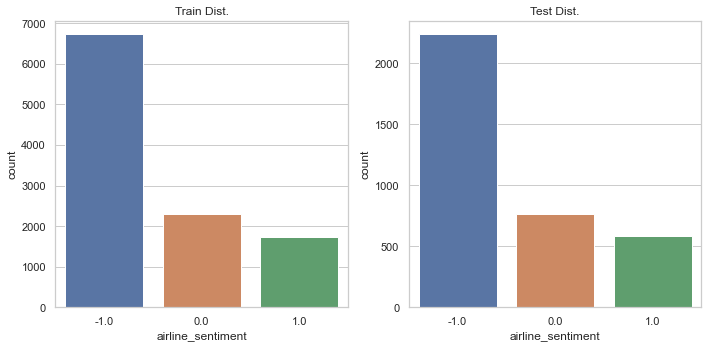

In [129]:
plt.subplots(figsize=(10,5),tight_layout=True)
plt.subplot(1,2,1)
sns.countplot(y_train)
plt.title("Train Dist.")
plt.subplot(1,2,2)
sns.countplot(y_test)
plt.title("Test Dist.")
plt.show()

They have similar distribution but still unbalanced.

### Modelling

![](JC_Unbabel_Spot_2.jpg)

In [130]:
#Classification
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [131]:
#Result
rf_acc = accuracy_score(y_test, pred)
rf_f1 = f1_score(y_test, pred, average="weighted")

print("Random Forest")
print("Accuracy : %",round(rf_acc*100,2))
print("F1 Score : %",round(rf_f1*100,2))

Random Forest
Accuracy : % 71.78
F1 Score : % 68.83


### Confusion matrix

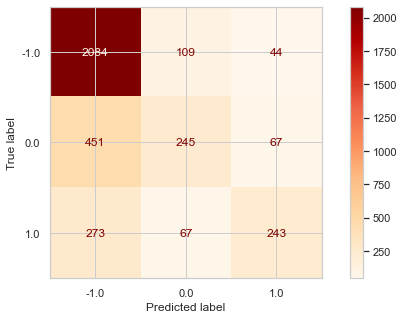

In [132]:
plot_confusion_matrix

(clf, X_test, y_test, cmap="OrRd")  
plt.show() 

Since the data is unbalanced, it predicts 0 as -1. 

### ROC Curve

from sklearn import metrics
fper, tper, thresholds = metrics.roc_curve(y_test, pred,) 
plot_roc_curve(fper, tper)

In [133]:
y_pred_proba = clf.predict_proba(X_test)

In [134]:
roc_auc_score= roc_auc_score(y_test,y_pred_proba, multi_class = "ovr")

In [135]:
print("ROC AUC Score: ",roc_auc_score)

ROC AUC Score:  0.8180490021409241


### Summary and Next Steps

We examined the columns in detail, made assumptions and made visualizations. 

Overall the model works fine, but there is a bias since -1 is more. 

Since the data is unbalanced, we can apply the **resampling** method.

We can try one of the methods using deep learning. 


![](JC_Unbabel_Header_B.jpg)

In [155]:
data["text"][14636]

'leaving minute late flight communication minute late flight called customer svc'